In [140]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [141]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [142]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [143]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [144]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [145]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [146]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [147]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [148]:
# Find the most recent date in the data set.
mrd = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]
mrd = dt.datetime.strptime(mrd, '%Y-%m-%d')
print(mrd)

2017-08-23 00:00:00


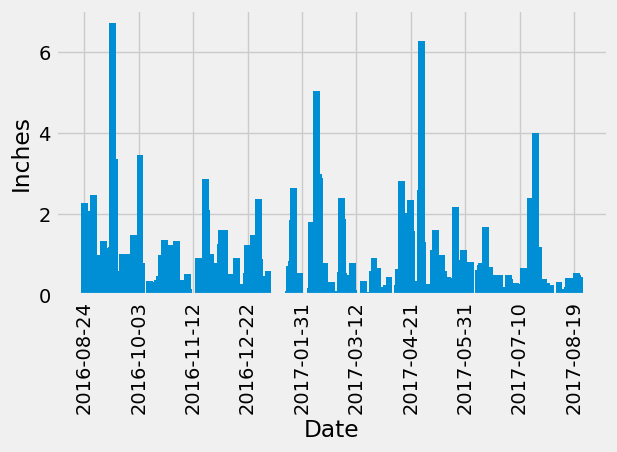

In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = mrd - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurements.date, measurements.prcp).filter(measurements.date >= year_ago).filter(measurements.date <= mrd).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=5)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.tight_layout()
plt.show()

#code check
#print(precipitation_scores)
#precipitation_df.head(20)

In [150]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe().round(4)
summary_stats

,Precipitation
count,2015.0000
mean,0.1765
std,0.4603
min,0.0000
25%,0.0000
50%,0.0200
75%,0.1300
max,6.7000


# Exploratory Station Analysis

In [151]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(stations.station)).scalar()
total_stations

9

In [152]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()

for station, count in station_counts:
    print(f"ID: {station}, Observation Count: {count}")

mostactive = station_counts[0][0]
print(f"{mostactive} had the most observations")

ID: USC00519281, Observation Count: 2772
ID: USC00519397, Observation Count: 2724
ID: USC00513117, Observation Count: 2709
ID: USC00519523, Observation Count: 2669
ID: USC00516128, Observation Count: 2612
ID: USC00514830, Observation Count: 2202
ID: USC00511918, Observation Count: 1979
ID: USC00517948, Observation Count: 1372
ID: USC00518838, Observation Count: 511
USC00519281 had the most observations


In [153]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).filter(measurements.station == mostactive).all()

min = temp_query[0][0]
max = temp_query[0][1]
avg = temp_query[0][2]
print(f"min = {min}, max= {max}, avg= {avg}")

min = 54.0, max= 85.0, avg= 71.66378066378067


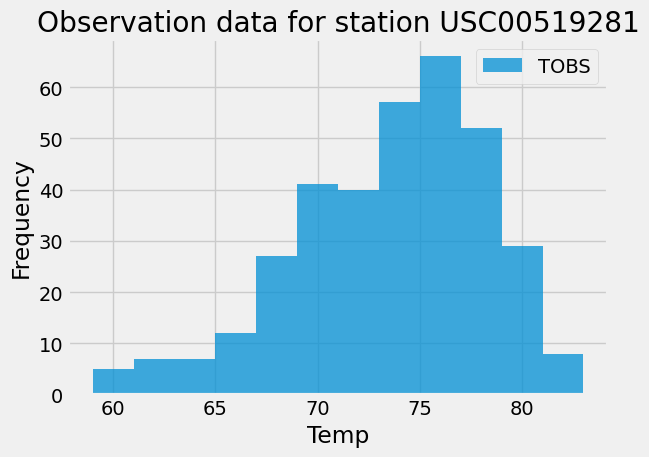

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past12mos = session.query(measurements.date, measurements.tobs).filter(measurements.station == mostactive).filter(measurements.date >= year_ago).filter(measurements.date <= mrd).all()

past12mos_df = pd.DataFrame(past12mos, columns=['Date', 'TOBS'])
#past12mos_df

plt.hist(past12mos_df['TOBS'], bins=12, alpha=0.75)
plt.title(f'Observation data for station {mostactive}')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.legend(['TOBS'])
plt.tight_layout()
plt.show()

# Close Session

In [155]:
# Close Session
session.close()